# GPU availability

In [6]:
# '''
import tensorflow as tf
from tensorflow.python.client import device_lib
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())
# '''

['/device:GPU:0']


# Free GPU Memory

In [7]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Libraries

In [8]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import skimage
from skimage.io import imread, imshow
#import ktrain

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
import skimage
from skimage.io import imread, imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Directory and params

In [18]:

height = 210
width = 210
crop = 210

best_model_name = 'HRD_VGG16_MOd_Mcc_loss_test1.h5'

factor=0.93
patience=2
epoch=200

#'''
'''Baseline path'''
TRAIN_PATH = r'/content/drive/My Drive/Leuk study re-designed/C-NMC/High Imbalance/Train - 1 to 100 ratio/enhanched'
#VAL_PATH = r'../input/5x-aug/Aug_5x/val'
BATCH_SIZE=10
r = 4
c = 4
#'''

# Crop

In [19]:
def crop_center(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

def crop_generator(batches, crop_length):
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = crop_center(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

# Data generator

In [20]:

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
                                  #featurewise_center=True,
                                  #featurewise_std_normalization=True,
                                  #validation_split=0.1)
train_batches = train_datagen.flow_from_directory(TRAIN_PATH,
                                                  class_mode='binary',
                                                  color_mode="rgb",
                                                  batch_size=BATCH_SIZE,
                                                  target_size=(450, 450),
                                                  shuffle=True,
                                                  seed=42
                                                  )

train_crops = crop_generator(train_batches, crop)


Found 3389 images belonging to 1 classes.


# Visulaize

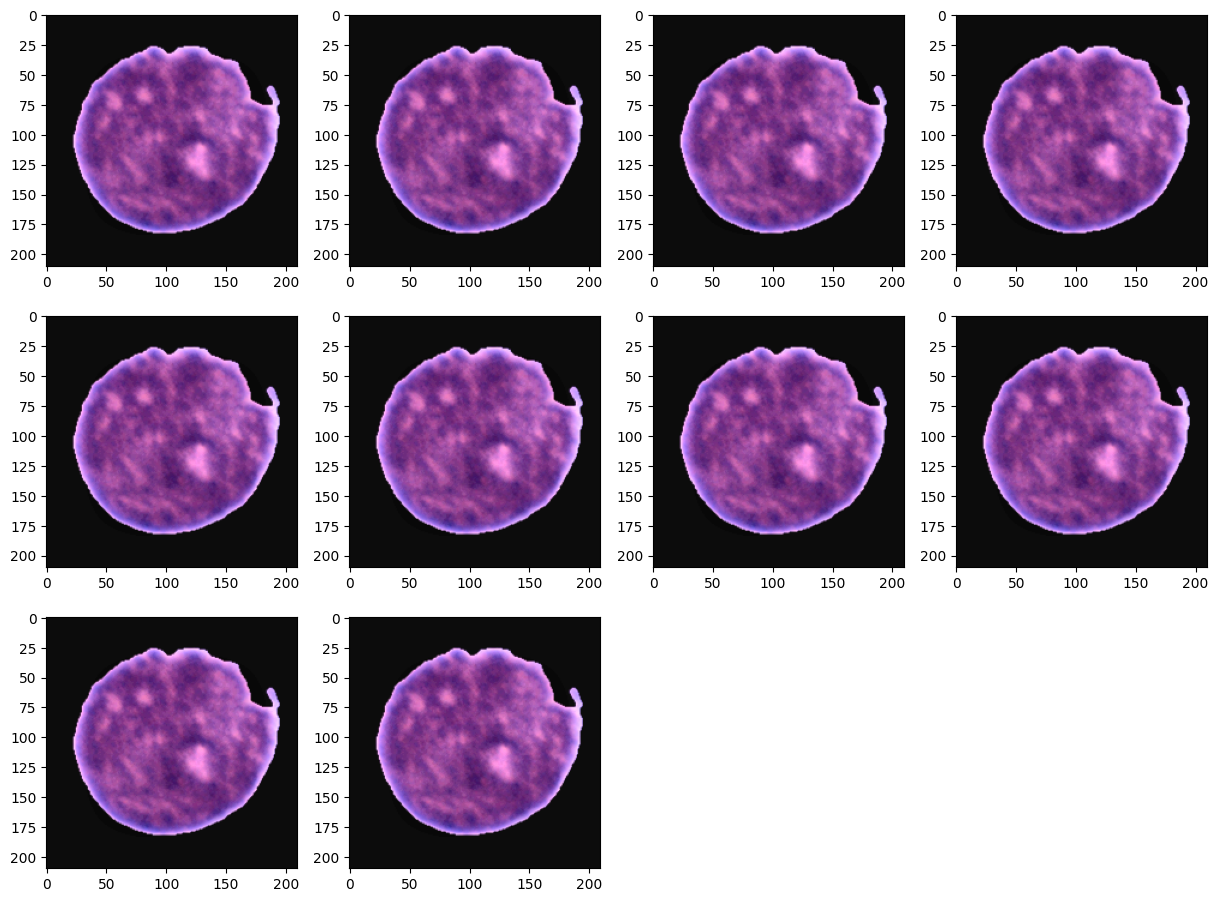

In [21]:

train_crops
x , y = next(train_crops)
plt.figure(figsize=(15,15))
i=0
for img in x:
    plt.subplot(r,c,i+1)
    plt.imshow(img)
    i+=1


255 8


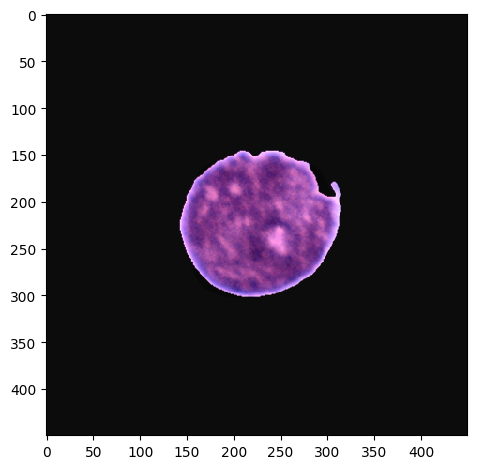

In [22]:
import skimage
from skimage.io import imread, imshow
import numpy as np

img = imread(r'/content/drive/My Drive/Leuk study re-designed/C-NMC/High Imbalance/Test/enhanched/hem/4.bmp')
#img = imread(r'F:\Leuk study re-designed\C-NMC\Low imbalance\Test\enhanched\hem\4.bmp')
imshow(img)
print(np.max(img), np.min(img))

# All models.
## One used at a time. so commented out rest of them.

In [23]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16


import tensorflow as tf
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(height,width,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation=tf.nn.sigmoid)(x)
x = Dense(4096, activation=tf.nn.sigmoid)(x)
prediction = Dense(1, activation=tf.nn.sigmoid)(x)

model = Model(inputs=base_model.input,outputs=prediction)

model.summary()



'''
import tensorflow as tf
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(height,width,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
x = base_model.output
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation=tf.nn.sigmoid)(x)

model = Model(inputs=base_model.input,outputs=prediction)

model.summary()
#'''

'''
from keras.applications import DenseNet121

base_model = DenseNet121(weights=None,
                         include_top=False,
                         input_tensor=None,
                         input_shape=(height,width,3),
                        )
x = base_model.output
x = GlobalAveragePooling2D()(x)
# x = Dense(1024, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(x)
# x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(0.5)(x)
# x = Dense(512, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(x)
# x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(0.5)(x)
prediction = Dense(1, activation=tf.nn.sigmoid)(x)

model = Model(inputs=base_model.input,outputs=prediction)
model.summary()
'''


'''
def get_model():
    base_model = tf.keras.applications.EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_tensor=None,
        input_shape=(height,width,3),
        pooling=None,
        classes=1,
        classifier_activation="sigmoid",
    )
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    prediction = Dense(1, activation=tf.nn.sigmoid)(x)

    model = Model(inputs=base_model.input,outputs=prediction)
    #model.compile(loss=[mcc_loss], optimizer='adam', metrics=['accuracy'])
    return model
model = get_model()
model.summary()
'''

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 210, 210, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 210, 210, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 210, 210, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 105, 105, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 105, 105, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 105, 105, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 52, 52, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 52, 52, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 52, 52, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 26, 26, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 26, 26, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 26, 26, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 13, 13, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 13, 13, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 13, 13, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 13, 13, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │      75,501,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 107,001,665 (408.18 MB)

 Trainable params: 107,001,665 (408.18 MB)

 Non-trainable params: 0 (0.00 B)

'\ndef get_model():\n    base_model = tf.keras.applications.EfficientNetB0(\n        include_top=False,\n        weights=\'imagenet\',\n        input_tensor=None,\n        input_shape=(height,width,3), \n        pooling=None,\n        classes=1,\n        classifier_activation="sigmoid",\n    )\n    x = base_model.output\n    x = GlobalAveragePooling2D()(x)\n    x = Dropout(0.5)(x)\n    prediction = Dense(1, activation=tf.nn.sigmoid)(x)\n\n    model = Model(inputs=base_model.input,outputs=prediction)\n    #model.compile(loss=[mcc_loss], optimizer=\'adam\', metrics=[\'accuracy\'])\n    return model\nmodel = get_model()\nmodel.summary()\n'

# F-1 loss

In [24]:

def f1_loss(y_true, y_pred):

    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)


# MCC loss

In [25]:

import tensorflow as tf
from tensorflow.keras import backend as K

def mcc_loss(y_true, y_pred):

    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0) * 1e2
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0) / 1e2

    up = tp*tn - fp*fn
    down = K.sqrt((tp+fp) * (tp+fn) * (tn+fp) * (tn+fn))

    mcc = up / (down + K.epsilon())
    mcc = tf.where(tf.math.is_nan(mcc), tf.zeros_like(mcc), mcc)

    return 1 - K.mean(mcc)


# Compile.
### Different loss used in this work. At a time commneted out rest of them while keepeing one intact

In [3]:
import tensorflow as tf
#import tensorflow_addons as tfa


adam_opt = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.0, beta_2=0.0, amsgrad=True)


model.compile(optimizer= adam_opt,
              #loss = 'binary_crossentropy',
              #loss = [binary_focal_loss(alpha=.25, gamma=2)],
              loss = [f1_loss],
              #loss = [mcc_loss],
              #loss = [mod_mcc_loss],
              #loss = tfa.losses.SigmoidFocalCrossEntropy(),
              metrics=['accuracy'])

NameError: name 'model' is not defined

In [30]:
checkpoint_path = "/content/drive/My Drive/Leuk study re-designed/C-NMC/High Imbalance/Train - 1 to 100 ratio/cp-{epoch:04d}.weights.h5" # Since you're only saving weights, you should use the .weights.h5 extension. If you're saving the whole model, you would use the .keras extension instead
checkpoint_dir = os.path.dirname(checkpoint_path)

In [1]:
import keras
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
best_model_name = best_model_name
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(best_model_name, monitor='accuracy', save_best_only=True, mode='max', save_freq=5*BATCH_SIZE),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=factor, verbose=1, patience=patience, mode='max'),
    tf.keras.callbacks.EarlyStopping(patience=5, verbose=1)]

NameError: name 'best_model_name' is not defined

In [2]:
import tensorflow as tf
#import tensorflow_addons as tfa

# Define optimizer
adam_opt = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.0, beta_2=0.0, amsgrad=True)

# Compile model
model.compile(optimizer=adam_opt,
              loss='binary_crossentropy',  # Keep the loss binary cross-entropy or custom one
              metrics=['accuracy', tfa.metrics.MatthewsCorrelationCoefficient(num_classes=1)])  # MCC as a metric


NameError: name 'model' is not defined

# Run

In [ ]:
'''history = model.fit(x_train, y_train, validation_split=0.1, shuffle=True, batch_size=10, epochs=100, callbacks = callbacks)'''

history  = model.fit(train_crops,
         steps_per_epoch=train_batches.n//train_batches.batch_size,
         epochs=epoch,
         verbose=1,
         #class_weight={0:5.51331361, 1:0.54986722},
         callbacks = callbacks)

Epoch 1/200
342/342 [==============================] - 51s 148ms/step - loss: 0.7674 - accuracy: 0.6222
Epoch 2/200
342/342 [==============================] - 49s 143ms/step - loss: 0.6815 - accuracy: 0.6664
Epoch 3/200
342/342 [==============================] - 49s 143ms/step - loss: 0.6903 - accuracy: 0.6978
Epoch 4/200
342/342 [==============================] - 49s 142ms/step - loss: 0.6576 - accuracy: 0.7254
Epoch 5/200
342/342 [==============================] - 49s 143ms/step - loss: 0.6633 - accuracy: 0.7356
Epoch 6/200
342/342 [==============================] - 49s 143ms/step - loss: 0.6417 - accuracy: 0.8013
Epoch 7/200
342/342 [==============================] - 48s 142ms/step - loss: 0.6549 - accuracy: 0.8379
Epoch 8/200
342/342 [==============================] - 46s 135ms/step - loss: 0.6456 - accuracy: 0.8142
Epoch 9/200
342/342 [==============================] - 48s 141ms/step - loss: 0.6334 - accuracy: 0.8417
Epoch 10/200
342/342 [==============================] - 49s 142m

Epoch 58/200
342/342 [==============================] - 48s 141ms/step - loss: 0.5807 - accuracy: 0.9962
Epoch 59/200
342/342 [==============================] - 46s 135ms/step - loss: 0.5389 - accuracy: 0.9953
Epoch 60/200
342/342 [==============================] - ETA: 0s - loss: 0.6054 - accuracy: 0.9959
Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.00038929460366489367.
342/342 [==============================] - 46s 135ms/step - loss: 0.6054 - accuracy: 0.9959
Epoch 61/200
342/342 [==============================] - 46s 136ms/step - loss: 0.5919 - accuracy: 0.9959
Epoch 62/200
342/342 [==============================] - ETA: 0s - loss: 0.5593 - accuracy: 0.9950
Epoch 00062: ReduceLROnPlateau reducing learning rate to 0.00036204398871632294.
342/342 [==============================] - 46s 136ms/step - loss: 0.5593 - accuracy: 0.9950
Epoch 63/200
342/342 [==============================] - 46s 135ms/step - loss: 0.6148 - accuracy: 0.9947
Epoch 64/200
342/342 [================

Epoch 148/200
342/342 [==============================] - 46s 135ms/step - loss: 0.5192 - accuracy: 0.9956
Epoch 149/200
342/342 [==============================] - ETA: 0s - loss: 0.6334 - accuracy: 0.9950
Epoch 00149: ReduceLROnPlateau reducing learning rate to 1.8474050357326632e-05.
342/342 [==============================] - 46s 135ms/step - loss: 0.6334 - accuracy: 0.9950
Epoch 150/200
342/342 [==============================] - 46s 135ms/step - loss: 0.5661 - accuracy: 0.9971
Epoch 151/200
342/342 [==============================] - ETA: 0s - loss: 0.6057 - accuracy: 0.9988
Epoch 00151: ReduceLROnPlateau reducing learning rate to 1.718086752589443e-05.
342/342 [==============================] - 46s 135ms/step - loss: 0.6057 - accuracy: 0.9988
Epoch 152/200
342/342 [==============================] - 46s 135ms/step - loss: 0.5466 - accuracy: 0.9965
Epoch 153/200
342/342 [==============================] - ETA: 0s - loss: 0.6818 - accuracy: 0.9956
Epoch 00153: ReduceLROnPlateau reducing 

Epoch 192/200
342/342 [==============================] - 46s 135ms/step - loss: 0.5984 - accuracy: 0.9944
Epoch 193/200
342/342 [==============================] - ETA: 0s - loss: 0.5858 - accuracy: 0.9959
Epoch 00193: ReduceLROnPlateau reducing learning rate to 3.7427164488690326e-06.
342/342 [==============================] - 46s 135ms/step - loss: 0.5858 - accuracy: 0.9959
Epoch 194/200
342/342 [==============================] - 46s 135ms/step - loss: 0.5913 - accuracy: 0.9965
Epoch 195/200
342/342 [==============================] - ETA: 0s - loss: 0.5728 - accuracy: 0.9971
Epoch 00195: ReduceLROnPlateau reducing learning rate to 3.48072629321905e-06.
342/342 [==============================] - 46s 136ms/step - loss: 0.5728 - accuracy: 0.9971
Epoch 196/200
342/342 [==============================] - 46s 135ms/step - loss: 0.5995 - accuracy: 0.9965
Epoch 197/200
342/342 [==============================] - ETA: 0s - loss: 0.6047 - accuracy: 0.9941
Epoch 00197: ReduceLROnPlateau reducing l

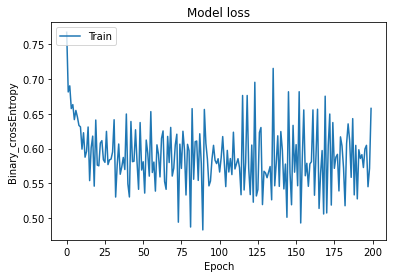

In [ ]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Binary_crossEntropy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

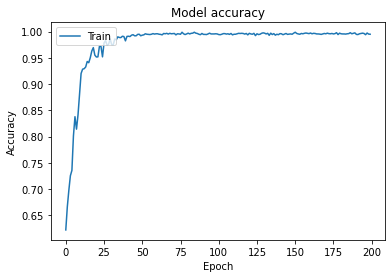

In [ ]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Stats

In [ ]:
print('Lowest training loss: ', min(history.history['loss']))

print('Highest training accuracy: ', max(history.history['accuracy']))


Lowest training loss:  0.4830648601055145
Highest training accuracy:  0.9988276958465576


# Prediction

In [ ]:


val_all_path = r'F:\Leuk study re-designed\C-NMC\High imbalance\Test\enhanched\all'
val_hem_path = r'F:\Leuk study re-designed\C-NMC\High imbalance\Test\enhanched\hem'

val_all_list = os.listdir(val_all_path)
#val_all_list.sort()

val_hem_list = os.listdir(val_hem_path)
#val_hem_list.sort()


print('val/all_list_length: ', len(val_all_list))
print('val/hem_list_length :', len(val_hem_list))

val_all_batch = np.zeros((len(val_all_list), height, width, 3), dtype=np.uint8)
val_hem_batch = np.zeros((len(val_hem_list), height, width, 3), dtype=np.uint8)

print('val_all_batch shape: ', val_all_batch.shape, 'val_hem_batch shape: ', val_hem_batch.shape)


def Read_n_Crop(list_data, batch, path):
    i=0
    for x in list_data:
        image = cv2.imread(os.path.join(path, x))
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = crop_center(image, (height,width,3))
        batch[i] = image
        i+=1

    print('batch type: ', type(batch), 'batch shape: ', batch.shape, 'batch dtype: ', batch.dtype, 'batch[0] shape: ', batch[0].shape, 'batch[0] dtype: ', batch[0].dtype)
    return batch


def crop_center(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

parasite_images=Read_n_Crop(val_all_list, val_all_batch, val_all_path)
uninf_images=Read_n_Crop(val_hem_list, val_hem_batch, val_hem_path)


para_label = np.array([0 for _ in range(len(parasite_images))])
uninf_label = np.array([1 for _ in range(len(uninf_images))])

print('parasite/all_label shape: ', para_label.shape, 'uninf_label shape: ', uninf_label.shape)

x_all = np.concatenate((parasite_images, uninf_images), axis=0)
y_all = np.concatenate((para_label, uninf_label), axis=0)
print('After concatenation.............................')
print('x_all shape: ', x_all.shape, 'y_all shape: ', y_all.shape)

########
'''Model imports here'''
#model = tf.keras.models.load_model(best_model_name)
model.load_weights(os.path.join(os.getcwd(), best_model_name))
########

x_all=x_all/255.0
# Make predictions using trained model
y_pred = model.predict(x_all, verbose=1)
print("Predictions: ", y_pred.shape)

y_pred_flat = []
for pred in y_pred:
    if pred > 0.5:
        y_pred_flat.append(1)
    else:
        y_pred_flat.append(0)
y_pred_flat = np.array(y_pred_flat)

val/all_list_length:  1219
val/hem_list_length : 648
val_all_batch shape:  (1219, 210, 210, 3) val_hem_batch shape:  (648, 210, 210, 3)
batch type:  <class 'numpy.ndarray'> batch shape:  (1219, 210, 210, 3) batch dtype:  uint8 batch[0] shape:  (210, 210, 3) batch[0] dtype:  uint8
batch type:  <class 'numpy.ndarray'> batch shape:  (648, 210, 210, 3) batch dtype:  uint8 batch[0] shape:  (210, 210, 3) batch[0] dtype:  uint8
parasite/all_label shape:  (1219,) uninf_label shape:  (648,)
After concatenation.............................
x_all shape:  (1867, 210, 210, 3) y_all shape:  (1867,)
59/59 [==============================] - 5s 81ms/step
Predictions:  (1867, 1)


# Classification report

In [ ]:
print('Samples classified as all / 1219: ', y_pred_flat.tolist().count(0))
print('Samples classified as hem / 648: ', y_pred_flat.tolist().count(1))

Samples classified as all / 1219:  178
Samples classified as hem / 648:  1689


In [ ]:
np.unique(y_pred_flat)

array([0, 1])

In [ ]:
print(y_pred_flat.tolist().count(0), y_pred_flat.tolist().count(1))

178 1689


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Classification report

confusion_mtx = confusion_matrix(y_all, y_pred_flat)
print(confusion_mtx)
target_names = ['0', '1']
report = classification_report(y_all, y_pred_flat, target_names=target_names, digits=4)
print(classification_report(y_all, y_pred_flat, target_names=target_names, digits=4))

[[ 137 1082]
 [  41  607]]
              precision    recall  f1-score   support

           0     0.7697    0.1124    0.1961      1219
           1     0.3594    0.9367    0.5195       648

    accuracy                         0.3985      1867
   macro avg     0.5645    0.5246    0.3578      1867
weighted avg     0.6273    0.3985    0.3084      1867



# Save model and stats

In [ ]:
import os

report_list = report.split()
for x in range(len(report_list)):
    if report_list[x] == 'accuracy':
        acc = report_list[x+1]
    elif report_list[x] == 'weighted':
        precision = report_list[x+2]
        recall = report_list[x+3]
        f1 = report_list[x+4]
print(acc, precision, recall, f1)

log_path = 'F:\Leuk study re-designed\Log\C-NMC\High imbalnce'
filename = best_model_name[:-2] + 'txt'#'baseline_run_3.txt'
f = open(os.path.join(log_path, filename), "w")

content = best_model_name + '\n\n'  + 'Location: old pc 64gb' + '\n' + 'Low Imbalance' + '\n' + 'Train-path=enhanched' + '\n' + 'Test-path=enhanched' + '\n\n' + 'height: ' + str(height) + '\t' + 'width: ' + str(width) + '\t' + 'crop: ' + str(crop) + '\n\n' + 'factor: ' + str(factor) + '\t' + 'patience: ' + str(patience) + '\t' + 'epoch: ' + str(epoch) + '\n\n' +'Lowest Training Loss: ' + str(min(history.history['loss'])) + '\n' +'Highest training accuracy: ' + str(max(history.history['accuracy'])) + '\n\n' + 'Accuracy: ' + str(acc) + '\t' + 'Precision: ' + str(precision) + '\t' + 'Recall: ' + str(recall) + '\t' + 'F1-score: ' + str(f1) + '\n\n' + 'all: ' + str(confusion_mtx[0]) + '\n\n' + 'hem: ' + str(confusion_mtx[1]) +  '\n      all hem'



f.write(content)
f.close()


0.3985 0.6273 0.3985 0.3084
